In [19]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random

x_train, y_train = datasets.load_svmlight_file('a9a')
x_test, y_test = datasets.load_svmlight_file('a9a.t')

x_train = x_train.toarray()
x_test = x_test.toarray()

y_train = ( y_train + 1 ) / 2
y_test = ( y_test + 1 ) / 2

#初始化w
w = np.zeros(124)
#初始化学习率
learnRate = 0.01

#计算训练集的行数
train_row_size, = y_train.shape
test_row_size, = y_test.shape
#生成一个行数=train_array_row_size的全1向量,算出X
temp_vector = np.ones(train_row_size)
X_train = np.column_stack((x_train,temp_vector))
temp_vector = np.ones(test_row_size)
X_test = np.column_stack((x_test,temp_vector))


In [20]:
def computeHypro(x):
    return 1 / (1 + np.exp(x))

In [21]:
def computeGradient_train():
     #算梯度更新w
    temp = random.randint(0,train_row_size-1)
    for n in range (124):
        hx = 1 / (1 + np.exp(-np.dot(w.T,X_train[temp])))
        w[n] = w[n] - learnRate * (hx - y_train[temp]) * X_train[temp][n]

In [22]:
def computeLoss():
    x = np.dot( -w.T,X_train.T)
    h = computeHypro(x)
    right_part = np.dot(y_train.T,np.log(h))
    
    x1 = np.ones(train_row_size) - y_train
    y1 = np.log(np.ones(train_row_size) - h)
    left_part = np.dot(x1.T,y1)
    
    loss = -(right_part + left_part) / train_row_size
    return loss

In [23]:
train_loss_tuple = []
for i in range (10000):
    computeGradient_train()
    train_loss_tuple.append(computeLoss())

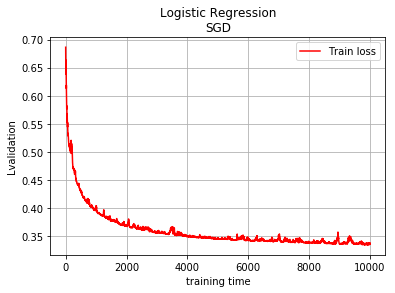

In [24]:
plt.title('Logistic Regression\nSGD')
plt.xlabel('training time')
plt.ylabel('Lvalidation')
plt.plot(train_loss_tuple,label= "Train loss",color = 'red')
plt.legend(loc='upper right')
plt.grid()
plt.show()